<a href="https://colab.research.google.com/github/Airinelizabath/Association-Rule-Mining/blob/17-01-2021-rule-doc-in-each-lab/exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Initialize**

In [ ]:
%pip install mlxtend --upgrade

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/file.txt')

In [ ]:
df.head()

,5485
0,1 champion products ch approves stock split ch...
1,2 computer terminal systems cpml completes sal...
2,1 cobanco inc cbco year net shr cts vs dlrs ne...
3,1 am international inc am nd qtr jan oper shr ...
4,1 brown forman inc bfd th qtr net shr one dlr ...


In [ ]:
df.shape

(5485, 1)

In [ ]:
df.describe()

,5485
count,5485
unique,5427
top,8 sumita says bank will intervene if necessary...
freq,3


In [ ]:
def get_label(text):
     for i in text:
            return int(i[0])

In [ ]:
df['label'] = df['5485'].apply(lambda x: get_label(x))

In [ ]:
df.head()

,5485,label
0,1 champion products ch approves stock split ch...,1
1,2 computer terminal systems cpml completes sal...,2
2,1 cobanco inc cbco year net shr cts vs dlrs ne...,1
3,1 am international inc am nd qtr jan oper shr ...,1
4,1 brown forman inc bfd th qtr net shr one dlr ...,1


In [ ]:
df.columns = ('text', 'label')
df['text']=df['text'].str[1:]

In [ ]:
df.head()

,text,label
0,champion products ch approves stock split cha...,1
1,computer terminal systems cpml completes sale...,2
2,cobanco inc cbco year net shr cts vs dlrs net...,1
3,am international inc am nd qtr jan oper shr l...,1
4,brown forman inc bfd th qtr net shr one dlr v...,1


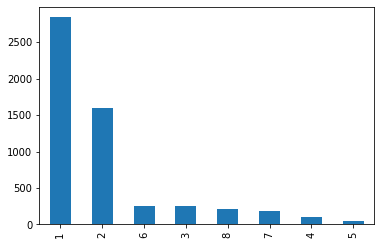

In [ ]:
df.label.value_counts().plot(kind='bar')

In [ ]:
#remove special characters and punctuation
df['text'] = df['text'].replace(r'[^A-Za-z0-9 ]+', '')

#remove single letters from text
df['text'] = df['text'].apply (lambda x: re.sub(r"((?<=^)|(?<= )).((?=$)|(?= ))", '', x).strip())

In [ ]:
df.head()

,text,label
0,champion products ch approves stock split cham...,1
1,computer terminal systems cpml completes sale ...,2
2,cobanco inc cbco year net shr cts vs dlrs net ...,1
3,am international inc am nd qtr jan oper shr lo...,1
4,brown forman inc bfd th qtr net shr one dlr vs...,1


### **KERAS - MLXTENT**


1.   reuters dataset
2.   keras tokenizer
3.   labels not included



In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
p=list(tokenizer.word_index.keys())
print(f'Vocabulary: {p}')
vectors = tokenizer.texts_to_matrix(df['text'], mode='binary')
print(vectors)

In [ ]:
p.insert(0,'#')
p

In [ ]:
len(p)

In [ ]:
np.shape(vectors)

In [ ]:
newarr = pd.DataFrame(vectors, columns=p)
newarr.head()

In [ ]:
%pip install mlxtend --upgrade

In [ ]:
df['label']

In [ ]:
newarr['#key'] = df['label']

In [ ]:
newarr=newarr.drop(['#','#key'],axis=1 )

In [ ]:
'''import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(df['label']).transform(df['label'])
ddf = pd.DataFrame(te_ary, columns=te.columns_)'''

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
fp=fpgrowth(newarr, min_support=0.5, use_colnames=True)

In [ ]:
from mlxtend.frequent_patterns import association_rules
asr=association_rules(fp, metric='confidence', min_threshold=0.2, support_only=False)

In [ ]:
asr

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(asr['support'], asr['confidence'],c=asr['lift'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.colorbar(label="Lift")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(asr.index.values,asr['lift'],c=asr['support'])
plt.xlabel('rule_index')
plt.ylabel('lift') 
plt.colorbar(label="Support")
plt.show()

### **COUNTVECTORIZER**
1. sklearn
2. reuters dataset
3. labels not included
4. countvectorizer 
5. mlxtent

In [ ]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 4.3 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/file.txt')

In [ ]:
df.head()

,5485
0,1 champion products ch approves stock split ch...
1,2 computer terminal systems cpml completes sal...
2,1 cobanco inc cbco year net shr cts vs dlrs ne...
3,1 am international inc am nd qtr jan oper shr ...
4,1 brown forman inc bfd th qtr net shr one dlr ...


In [ ]:
df.shape

(5485, 1)

In [ ]:
def get_label(text):
     for i in text:
            return int(i[0])

In [ ]:
df['label'] = df['5485'].apply(lambda x: get_label(x))

In [ ]:
df.columns = ('text', 'label')
df['text']=df['text'].str[1:]

In [ ]:
df.head()

,text,label
0,champion products ch approves stock split cha...,1
1,computer terminal systems cpml completes sale...,2
2,cobanco inc cbco year net shr cts vs dlrs net...,1
3,am international inc am nd qtr jan oper shr l...,1
4,brown forman inc bfd th qtr net shr one dlr v...,1


In [ ]:
#remove special characters and punctuation
df['text'] = df['text'].replace(r'[^A-Za-z0-9 ]+', '')

#remove single letters from text
df['text'] = df['text'].apply (lambda x: re.sub(r"((?<=^)|(?<= )).((?=$)|(?= ))", '', x).strip())

NameError: ignored

In [ ]:
df.head()

,text,label
0,champion products ch approves stock split cham...,1
1,computer terminal systems cpml completes sale ...,2
2,cobanco inc cbco year net shr cts vs dlrs net ...,1
3,am international inc am nd qtr jan oper shr lo...,1
4,brown forman inc bfd th qtr net shr one dlr vs...,1


In [ ]:
vectorizer = CountVectorizer(stop_words='english', binary=True)

In [ ]:
X_vect = vectorizer.fit_transform(df['text'])

In [ ]:
type(X_vect)

scipy.sparse.csr.csr_matrix

In [ ]:
import scipy.sparse
A=pd.DataFrame.sparse.from_spmatrix(X_vect)

In [ ]:
type(A)

pandas.core.frame.DataFrame

In [ ]:
A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,19639,19640,19641,19642,19643,19644,19645,19646,19647,19648,19649,19650,19651,19652,19653,19654,19655,19656,19657,19658,19659,19660,19661,19662,19663,19664,19665,19666,19667,19668,19669,19670,19671,19672,19673,19674,19675,19676,19677,19678
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
 FEAT=vectorizer.get_feature_names_out()

In [ ]:
type(FEAT)

numpy.ndarray

In [ ]:
FEAT.tolist()

['aa',
 'aaa',
 'aac',
 'aachener',
 'aagiy',
 'aaix',
 'aam',
 'aancor',
 'aap',
 'aar',
 'aare',
 'aarn',
 'aarnoud',
 'aaron',
 'aati',
 'ab',
 'abal',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abatement',
 'abbas',
 'abbett',
 'abbey',
 'abbreviated',
 'abc',
 'abdel',
 'abdelaziz',
 'abdul',
 'abdulaziz',
 'abdullah',
 'abercrombie',
 'abev',
 'abex',
 'abf',
 'abi',
 'abide',
 'abiding',
 'abidjan',
 'abilene',
 'abilities',
 'ability',
 'ablaze',
 'able',
 'abm',
 'abn',
 'abnn',
 'abnormally',
 'aboard',
 'abolish',
 'abolished',
 'abolishing',
 'abolition',
 'abort',
 'aborted',
 'abover',
 'abraham',
 'abroad',
 'abrupt',
 'abs',
 'absb',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolve',
 'absorb',
 'absorbed',
 'absorbing',
 'absorption',
 'abstain',
 'abu',
 'abundance',
 'abundant',
 'abuse',
 'abuses',
 'abusing',
 'abusive',
 'abx',
 'abz',
 'ac',
 'academics',
 'academy',
 'acccounts',
 'accelerate',
 'accelerated',
 'accelerating',
 'accel

In [ ]:
A.columns=FEAT

In [ ]:
A

,aa,aaa,aac,aachener,aagiy,aaix,aam,aancor,aap,aar,aare,aarn,aarnoud,aaron,aati,ab,abal,abandon,abandoned,abandoning,abandonment,abatement,abbas,abbett,abbey,abbreviated,abc,abdel,abdelaziz,abdul,abdulaziz,abdullah,abercrombie,abev,abex,abf,abi,abide,abiding,abidjan,...,zeebrugge,zegl,zeitung,zen,zenith,zentralbank,zentralsparkasse,zero,zfour,zhao,zhejiang,zhou,zico,ziegler,ziering,zim,zimbabwe,zimmer,zimoil,zimr,zinc,ziyang,znat,zoete,zolotukhin,zond,zondervan,zone,zones,zorinsky,zubedei,zubeidi,zuccherifici,zuckerman,zulia,zur,zurich,zuyuan,zy,zzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#A['#'] = df['label'] 

In [ ]:
#A['#']

In [ ]:
#df2 = A.join(pd.get_dummies(A.pop('#'))) #label to binary

In [ ]:
#df2

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
fp=fpgrowth(A, min_support=0.2, use_colnames=True)

In [ ]:
from mlxtend.frequent_patterns import association_rules
asr=association_rules(fp, metric='confidence', min_threshold=0.2, support_only=False)

In [ ]:
association_rules(fp, metric='confidence', min_threshold=0, support_only=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(reuter),(said),0.911395,0.565360,0.554786,0.608722,1.076697,0.039520,1.110821
1,(said),(reuter),0.565360,0.911395,0.554786,0.981296,1.076697,0.039520,4.737328
2,(mln),(reuter),0.490975,0.911395,0.473838,0.965095,1.058921,0.026365,2.538447
3,(reuter),(mln),0.911395,0.490975,0.473838,0.519904,1.058921,0.026365,1.060256
4,(mln),(said),0.490975,0.565360,0.261623,0.532863,0.942520,-0.015955,0.930433
...,...,...,...,...,...,...,...,...,...
397,(qtr),(vs),0.224795,0.365725,0.207840,0.924574,2.528061,0.125627,8.409263
398,(cts),(qtr),0.379398,0.224795,0.205287,0.541086,2.407021,0.120000,1.689217
399,(qtr),(cts),0.224795,0.379398,0.205287,0.913220,2.407021,0.120000,7.151419
400,(reuter),(corp),0.911395,0.294075,0.284594,0.312262,1.061847,0.016576,1.026446


In [ ]:
asr["antecedent_len"] = asr["antecedents"].apply(lambda x: len(x))
asr["conseqent_len"]=asr["consequents"].apply(lambda x: len(x))
#p=['sdvb',2,3,4,'dshbs','gshdg',5]
y = lambda x : [any([str(ele).isdigit() for ele in i]) for i in x ]
#asr["contains"]=asr["antecedents"].apply(lambda x : [any([str(ele).isdigit() for ele in i]) for i in x ])
asr["contains"]=y(asr['antecedents'])
asr["contains_conseq"]=y(asr['consequents'])
#item=[1,2,3,4,5,6,7,8]
#asr[asr['antecedents']=={item}]
#only outputs first true value
asr[(asr['antecedent_len'] > 1) & (asr['lift']>=1 ) & (asr['contains']==True) & (asr['contains_conseq']==True) ]  #either antecedent or consequent works ; not both
#asr[(asr['antecedents']=={1}) | (asr['antecedents']=={2})| (asr['antecedents']=={3})| (asr['antecedents']=={4})| (asr['antecedents']=={5})| (asr['antecedents']=={6})| (asr['antecedents']=={7})| (asr['antecedents']=={8})]

# ?? why consequent does not have any label categories. There are around 5485 rows × 19679 columns of data. Also only 1 and 2 are present.  ->  bcz most of the antecedent which have numbers in antecent may not have cosequent numbers because of the non-overlapping of same labels is rare

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,conseqent_len,contains,contains_conseq


Rules with 
1. atleast two itemset in consequent
2. lift > 1

(3. atleast one of the labels {1,2,3,4,5,6,7,8} in consequent part   & (asr['contains_conseq']==True)  )

In [ ]:
asr[(asr['conseqent_len'] > 1) & (asr['lift']>=1 )]  #either antecedent or consequent works ; not both

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,conseqent_len,contains,contains_conseq
10,(reuter),"(mln, said)",0.911395,0.261623,0.258341,0.283457,1.083456,0.019899,1.030471,1,2,False,False
19,(reuter),"(company, said)",0.911395,0.258706,0.256335,0.281256,1.087167,0.020553,1.031375,1,2,False,False
20,(company),"(reuter, said)",0.292799,0.554786,0.256335,0.875467,1.578027,0.093895,3.575070,1,2,False,False
21,(said),"(reuter, company)",0.565360,0.288605,0.256335,0.453402,1.571011,0.093170,1.301496,1,2,False,False
31,(mln),"(reuter, dlrs)",0.490975,0.399088,0.302279,0.615670,1.542691,0.106336,1.563531,1,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,(vs),"(net, reuter, mln, shr)",0.365725,0.202917,0.200912,0.549352,2.707274,0.126700,1.768748,1,4,False,False
390,(net),"(vs, reuter, mln, shr)",0.331632,0.203464,0.200912,0.605827,2.977566,0.133436,2.020780,1,4,False,False
391,(reuter),"(vs, net, mln, shr)",0.911395,0.201459,0.200912,0.220444,1.094241,0.017303,1.024354,1,4,False,False
392,(mln),"(vs, net, reuter, shr)",0.490975,0.249407,0.200912,0.409209,1.640725,0.078459,1.270488,1,4,False,False


Rules with 
1. atleast two itemset in antecedent
2. lift > 1


( 3. atleast one of the labels {1,2,3,4,5,6,7,8} in antecedent part  & (asr['contains']==True)  ) 

In [ ]:
asr[(asr['antecedent_len'] > 1) & (asr['lift']>=1 )]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,conseqent_len,contains,contains_conseq
7,"(mln, said)",(reuter),0.261623,0.911395,0.258341,0.987456,1.083456,0.019899,7.063810,2,1,False,False
16,"(reuter, company)",(said),0.288605,0.565360,0.256335,0.888187,1.571011,0.093170,3.887203,2,1,False,False
17,"(reuter, said)",(company),0.554786,0.292799,0.256335,0.462044,1.578027,0.093895,1.314608,2,1,False,False
18,"(company, said)",(reuter),0.258706,0.911395,0.256335,0.990839,1.087167,0.020553,9.671608,2,1,False,False
28,"(mln, reuter)",(dlrs),0.473838,0.420966,0.302279,0.637938,1.515413,0.102809,1.599265,2,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,"(net, mln)","(vs, reuter, shr)",0.265451,0.255059,0.200912,0.756868,2.967421,0.133206,3.063937,2,3,False,False
385,"(net, shr)","(vs, reuter, mln)",0.253236,0.215132,0.200912,0.793377,3.687856,0.146432,3.798541,2,3,False,False
386,"(mln, reuter)","(vs, net, shr)",0.473838,0.250137,0.200912,0.424009,1.695110,0.082387,1.301867,2,3,False,False
387,"(reuter, shr)","(vs, net, mln)",0.259070,0.213127,0.200912,0.775510,3.638728,0.145697,3.505163,2,3,False,False


In [ ]:
asr

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,conseqent_len,contains,contains_conseq
0,(reuter),(said),0.911395,0.565360,0.554786,0.608722,1.076697,0.039520,1.110821,1,1,False,False
1,(said),(reuter),0.565360,0.911395,0.554786,0.981296,1.076697,0.039520,4.737328,1,1,False,False
2,(mln),(reuter),0.490975,0.911395,0.473838,0.965095,1.058921,0.026365,2.538447,1,1,False,False
3,(reuter),(mln),0.911395,0.490975,0.473838,0.519904,1.058921,0.026365,1.060256,1,1,False,False
4,(mln),(said),0.490975,0.565360,0.261623,0.532863,0.942520,-0.015955,0.930433,1,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,(qtr),(vs),0.224795,0.365725,0.207840,0.924574,2.528061,0.125627,8.409263,1,1,False,False
398,(cts),(qtr),0.379398,0.224795,0.205287,0.541086,2.407021,0.120000,1.689217,1,1,False,False
399,(qtr),(cts),0.224795,0.379398,0.205287,0.913220,2.407021,0.120000,7.151419,1,1,False,False
400,(reuter),(corp),0.911395,0.294075,0.284594,0.312262,1.061847,0.016576,1.026446,1,1,False,False


In [ ]:
'''consrest=asr[(asr['conseqent_len'] > 1) & (asr['lift']>=1 ) & (asr['contains_conseq']==True) ]  #either antecedent or consequent works ; not both
antrest=asr[(asr['antecedent_len'] > 1) & (asr['lift']>=1 ) & (asr['contains']==True) ]'''

consrest=asr[(asr['conseqent_len'] > 1) & (asr['lift']>=1 )]  #either antecedent or consequent works ; not both
antrest=asr[(asr['antecedent_len'] >1) & (asr['lift']>=1 )]

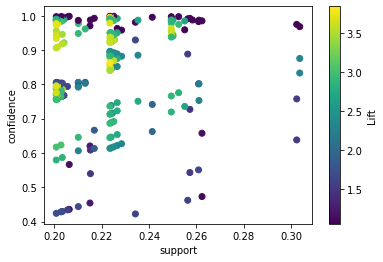

In [ ]:
#filtered rule 

import matplotlib.pyplot as plt
plt.scatter(antrest['support'], antrest['confidence'], c=antrest['lift'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.colorbar(label="Lift")
plt.show()

# colour with respect to lift

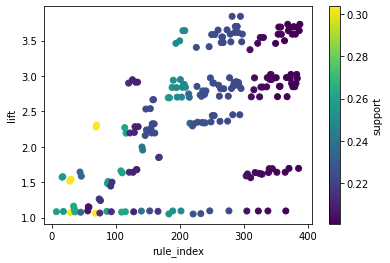

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(antrest.index.values,antrest['lift'],c=antrest['support'])
plt.xlabel('rule_index')
plt.ylabel('lift') 
plt.colorbar(label="support")
plt.show()

In [ ]:
a=[]
b=[]
e=[]
c=[0]*8
d=[0]*8
f=[0]*8
for i in range(len(A['qtr'])):
  if(A['cts'][i]==1 and A['qtr'][i]==0):
    a.append(i)
  if(A['cts'][i]==0 and A['qtr'][i]==1):
    b.append(i)
  if(A['cts'][i]==1 and A['qtr'][i]==1):
    e.append(i)
for each in a:
  c[df['label'][each]]=c[df['label'][each]]+1
for each in b:
  d[df['label'][each]]=d[df['label'][each]]+1
for each in e:
  f[df['label'][each]]=f[df['label'][each]]+1

In [ ]:
print(c)
print(d)
print(f)

[0, 900, 26, 0, 0, 0, 29, 0]
[0, 103, 0, 1, 0, 0, 3, 0]
[0, 1125, 1, 0, 0, 0, 0, 0]


In [ ]:
asr["antecedents"] = asr["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
asr["consequents"] = asr["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")


In [ ]:
 def abc(ant,cons):
  a=[]
  b=[]
  e=[]
  c=[0]*8
  d=[0]*8
  f=[0]*8
  for i in range(len(A[ant])):
    if(A[cons][i]==0 and A[ant][i]==1):
      a.append(i)
    if(A[cons][i]==1 and A[ant][i]==0):
      b.append(i)
    if(A[cons][i]==1 and A[ant][i]==1):
      e.append(i)
  for each in a:
    c[df['label'][each]-1]=c[df['label'][each]-1]+1
  for each in b:
    d[df['label'][each]-1]=d[df['label'][each]-1]+1
  for each in e:
    f[df['label'][each]-1]=f[df['label'][each]-1]+1
  print(c)
  print(d)
  print(f)
#abc('reuters','cts')
for i in range(len(asr)):
  if(asr['antecedent_len'][i]==1 and asr['conseqent_len'][i]==1):
    print(str(i)+"\t"+str(asr['antecedents'][i] + "  ->  " +str(asr['consequents'][i])))
    print("******************************\n")
    abc(asr['antecedents'][i],asr['consequents'][i])
    print("******************************\n")

0	reuter  ->  said
******************************

[1901, 13, 10, 7, 2, 5, 10, 8]
[6, 33, 2, 1, 0, 6, 7, 3]
[774, 1408, 215, 100, 36, 214, 129, 167]
******************************

1	said  ->  reuter
******************************

[6, 33, 2, 1, 0, 6, 7, 3]
[1901, 13, 10, 7, 2, 5, 10, 8]
[774, 1408, 215, 100, 36, 214, 129, 167]
******************************

2	mln  ->  reuter
******************************

[49, 27, 5, 0, 3, 8, 0, 2]
[1050, 728, 163, 82, 28, 118, 123, 108]
[1625, 693, 62, 25, 10, 101, 16, 67]
******************************

3	reuter  ->  mln
******************************

[1050, 728, 163, 82, 28, 118, 123, 108]
[49, 27, 5, 0, 3, 8, 0, 2]
[1625, 693, 62, 25, 10, 101, 16, 67]
******************************

4	mln  ->  said
******************************

[1214, 23, 9, 0, 3, 6, 0, 3]
[320, 744, 159, 76, 26, 117, 120, 104]
[460, 697, 58, 25, 10, 103, 16, 66]
******************************

5	said  ->  mln
******************************

[320, 744, 159, 76, 26, 117, 120, 

In [ ]:
a=[]
k=[1,2,3,4,5,6,7,8]
for i in range(len(A['reuters'])):
    if(A['said'][i]==0 or A['reuters'][i]==1):
      a.append(i)
print(len(a))
c=[0]*8
for each in a:
  if(df['label'][each] not in k):
    print(df['label'][each])
  else:
    c[df['label'][each]-1] = c[df['label'][each]-1]+1
    

2555


In [ ]:
a[2550:]

[5471, 5477, 5478, 5479, 5480]

In [ ]:
df['label'][5480]

1

In [ ]:
c

[2083, 208, 65, 22, 11, 56, 62, 48]

In [ ]:
asr['antecedents'][0]

'reuter'

In [ ]:
type(asr['antecedents'][0])

str

### **Pyfpgrowth**

Failed

In [ ]:
pip install pyfpgrowth

In [ ]:
import pyfpgrowth
patterns = pyfpgrowth.find_frequent_patterns(df, 2)

In [ ]:
patterns

{('e',): 2, ('l',): 2, ('t',): 2}

### **Orange**

**Not completed**

In [ ]:
pip install Orange3

In [ ]:
pip install Orange3-Associate

In [ ]:
from orangecontrib.associate.fpgrowth import *  

In [ ]:
#df3=df2.values.tolist()
df3=A.values.tolist()

**Try 1.**

actual words retrievel - plm

In [ ]:
from scipy.sparse import lil_matrix  # other types would convert to LIL anyway
X = lil_matrix(df3)

In [ ]:
type(X)

scipy.sparse.lil.lil_matrix

In [ ]:
gen = frequent_itemsets(X, .2)
gen

<generator object frequent_itemsets at 0x7f8535b4a750>

In [ ]:
itemsets = list(gen)
itemsets

[(frozenset({3534}), 1606),
 (frozenset({4012}), 1613),
 (frozenset({4300}), 2081),
 (frozenset({5229}), 2309),
 (frozenset({11262}), 2693),
 (frozenset({4300, 11262}), 1134),
 (frozenset({5229, 11262}), 1701),
 (frozenset({11791}), 1819),
 (frozenset({4300, 11791}), 1330),
 (frozenset({11262, 11791}), 1456),
 (frozenset({12854}), 1461),
 (frozenset({14008}), 1233),
 (frozenset({4300, 14008}), 1126),
 (frozenset({14984}), 4999),
 (frozenset({3534, 14984}), 1583),
 (frozenset({4012, 14984}), 1561),
 (frozenset({4300, 14984}), 1999),
 (frozenset({5229, 14984}), 2189),
 (frozenset({11262, 14984}), 2599),
 (frozenset({4300, 11262, 14984}), 1132),
 (frozenset({5229, 11262, 14984}), 1658),
 (frozenset({11791, 14984}), 1786),
 (frozenset({4300, 11791, 14984}), 1324),
 (frozenset({11262, 11791, 14984}), 1431),
 (frozenset({12854, 14984}), 1383),
 (frozenset({14008, 14984}), 1165),
 (frozenset({15409}), 3101),
 (frozenset({3534, 15409}), 1419),
 (frozenset({5229, 15409}), 1461),
 (frozenset({11

**try2**

In [ ]:
import Orange
rules = Orange.associate.AssociationRulesSparseInducer(df3, support=0.3)
print
("Supp", "Conf", "Rule")
for r in rules[:5]:
    print(r.support, r.confidence, r)

AttributeError: ignored

**try3**

In [ ]:
itemsets = dict(frequent_itemsets(df3, .05))

In [ ]:
len(itemsets)

3

In [ ]:
itemsets

{frozenset({0}): 5485, frozenset({1}): 5485, frozenset({0, 1}): 5485}

In [ ]:
len(df3)

5485

In [ ]:
#df3=df2.values.tolist()
df3=A.values.tolist()

In [ ]:
from numpy import array
a = array(df3)

In [ ]:
a.shape

(5485, 19679)

In [ ]:
col=A.columns.values.tolist()

In [ ]:
col.append(a)

In [ ]:
col

In [ ]:
from orangecontrib.associate.fpgrowth import *  

In [ ]:
gen=frequent_itemsets(a, .002)

In [ ]:
gen

<generator object frequent_itemsets at 0x7f27afcc89d0>

In [ ]:
itemsets=list(gen)
itemsets

In [ ]:
'''b=df['text'].str.split(' ')
import pandas as pd
b=pd.arrays.SparseArray(b)
type(b)'''

In [ ]:
X, mapping = OneHot.encode(df, include_class=False)

AttributeError: ignored

In [ ]:
itemsets = dict(frequent_itemsets(b, .5))
len(itemsets)

TypeError: ignored

In [ ]:
frequent_itemsets=apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets